# **Machine Learning Model for Bank Marketing Campaign**

Oleh : Yanfa Anandika

## **A. Bussiness Understanding**

### **Latar Belakang**

Sebuah perusahaan perbankan melakukan kampanye pemasaran untuk menawarkan berbagai produk keuangan salah satunya deposito. Untuk meningkatkan penjualan produk tersebut Bank melakukan kampanye pemasaran melalui kontak langsung kenasabah via telepon dan pesan, untuk mendapatkan nasabah baru

Namun kamapanye seperti ini juga memakan waktu dan biaya yang cukup besar karena banyak nasabah yang dihubungi tetapi belum tentu semuanya tertarik untuk berlangganan produk tersebut

### **Tujuan Bisnis**

Maka tujuan dari kampanye pemasaran ini diantaranya :
- Meningkatkan penggunaan produk Bank yaitu deposito
- Menambah nasabah baru untuk membuka rekening deposito
- Meningkatkan pemasukan Bank

Namun upaya upaya tesebut juga harus kita perhatikan untuk cost dan benefitnya, agar lebih efisien dan tepat sasaran maka pembuatan model untuk memprediksi kandidat nasabah yang akan menggunakan produk ini dan melakukan deposito

### **Analytical Approach**

Dengan data yang telah dimiliki, dapat digunakan untuk membuat model prediksi kandidat nasabah yang akan menggunakan produk hingga melakukan deposito, dengan membangun model klasifikasi. Dengan tujuan :
- Campaign Program yang lebih efisien dan meminimalisir biaya operasional
- Meningkatkan efektivitas Campaign Program dengan cara menargetkan nasabah yang memiliki kemungkinan tinggi untuk menggunakan produk hingga melakukan deposito
- Meminimalisir biaya operasional dengan mengurangi jumlah panggilan yang tidak tepat sasaran

### **Data Understanding**

Dataset yang digunakan adalah `data_bank_marketing_campaign.csv`

- `age`: Usia nasabah

- `job`: Pekerjaan nasabah

- `balance`: Saldo tabungan rata-rata nasabah

- `housing`: Apakah nasabah memiliki kredit rumah

- `loan`: Apakah nasabah memiliki pinjaman pribadi

- `contact`: Jenis komunikasi kontak yang digunakan

- `month`: Bulan terakhir nasabah dihubungi pada tahun tersebut

- `campaign`: Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah tersebut

- `pdays`: Jumlah hari sejak nasabah terakhir dihubungi dalam kampanye sebelumnya

- `poutcome`: Hasil dari kampanye pemasaran sebelumnya

- `deposit`: Apakah nasabah akhirnya membuka deposito atau tidak

### **Metrics Evaluation**

#### ***Budget Campaign Program***
Setelah melakukan observasi mengenai data Bank Campaign ini, ditemukan bahwa data ini adalah data dari Bank di negara Portugal, yang mana Negara tersebut menggunakan kurs Euro (€)

Berikut adalah rata rata budget yang ditetapkan bank untuk marketing (Sumber : [ABA Banking Journal](https://bankingjournal.aba.com/2025/01/bank-marketing-budget-and-staffing-considerations-for-2025/))

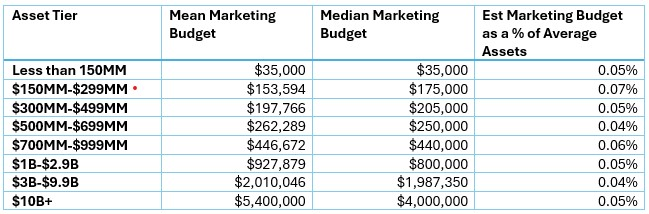

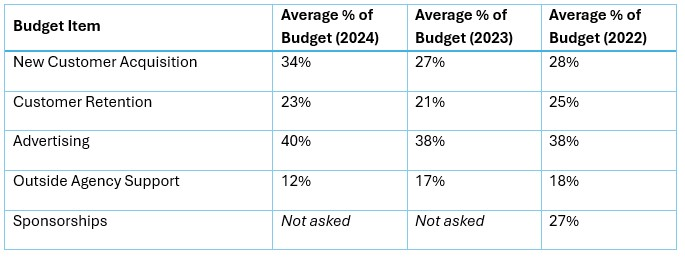

- Jika Total Asset Bank diasumsikan diantara \$ 150m - $ 299m
- Yang berarti Bank memberikan budget untuk marketing +- sebesar $ 175.000 atau sekitar € 149.000
- Dan budget untuk Campaign Program (New Customer Acquisition) sebesar € 149.000 x 34% = € 50.000
- Dengan budget € 50.000 bisa digunakan untuk akuisisi 10 ribu nasabah baru € 50.000 / 10.000 = € 5/Nasabah

#### ***Cost - Benefit Calculation***
Jika dilihat berdasarkan data, rata rata nasabah memiliki saldo € 550, diasumsikan deposit nasabah sebesar 50% total saldo yaitu € 275

Misal bunga deposito 3% per bulan
- € 275 x 3 % = € 8,25 (biaya deposito)

Misal bank salurkan dana ke kredit dengan bunga 10% per bulan
- € 275 × 10% = € 27,5 (pendapatan Bank)

Biaya operasional untuk menghubungi satu nasabah = € 5

Maka perhitungannya :
- TP : € 27,5 - € 8,25 - € 5 = **+ € 14,25** (net benefit)
- TN : **+ € 5** (hemat biaya operasional)
- FP : **- € 5** (rugi biaya operasional)
- FN : **- € 14,25** (kehilangan peluang net benefit)

#### ***Target Variable***

Target - `deposit`

- 0 Nasabah tidak membuka rekening deposito
- 1 Nasabah membuka rekening deposito

TP : Model memprediksi calon nasabah yang **membuka deposito** dan **benar** mereka **membuka deposito**

TN : Model memprediksi calon nasabah yang **tidak membuka deposito** dan **benar** mereka **tidak membuka deposito**

FP : Model memprediksi calon nasabah yang **membuka deposito** tapi sebenarnya mereka **tidak membuka deposito**

FN : Model memprediksi calon nasabah yang **tidak membuka deposito** tapi sebenarnya mereka **membuka deposito**  

#### ***Cost Analysis***  

TP : **+ € 14,25** (bank benar telepon calon nasabah yang akhirnya buka deposito -> dapat net benefit)

TN : **+ € 5** (calon nasabah tidak dihubungi dan memang tidak buka deposito -> hemat biaya operasional)

FP : **- € 5** (bank salah telepon calon nasabah -> rugi biaya operasional)

FN : **- € 14,25** (bank tidak telepon calon nasabah yang sebenarnya mau buka -> kehilangan peluang net benefit)  

- Jika dilihat dari kerugian terbesar ada pada FN (Recall)

- Namun jika terlalu fokus pada FN (Recall) dikhawatirkan FP (Precision) akan meningkat karena model jadi longgar / semakin banyak juga nasabah yang aktualnya (0) namun diprediksi (1)

- Walaupun kerugian FP (**- € 5**) tidak sebesar FN (**- € 14,25**), total kerugian FP bisa signifikan jika jumlahnya meningkat juga

- Meskipun prioritas ada pada FN (Recall) kita tetap perlu memperhatikan nilai FP (Precision)

- Dengan tujuan untuk meminimalkan kehilangan nasabah yang akan membuka deposito dan tetap mengurangi biaya operasional kampanye

- Meskipun Recall sebagai prioritas namun Precision juga perlu diperhatikan maka F1 score yang digunakan sebagai metrik utama

## **B. EDA**

In [952]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [953]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [955]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


***Mengubah kolom `deposit` manjadi 0 dan 1***

In [956]:
df['deposit'].replace({'no':0, 'yes':1}, inplace=True)

C:\Users\Yanfa\AppData\Local\Temp\ipykernel_15576\2972641282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deposit'].replace({'no':0, 'yes':1}, inplace=True)
C:\Users\Yanfa\AppData\Local\Temp\ipykernel_15576\2972641282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['deposit'].repla

In [957]:
df['deposit'].value_counts(normalize=True)

deposit
0    0.522335
1    0.477665
Name: proportion, dtype: float64

- Proporsi label target tidak terlalu imbalance

***Hubungan kolom kategorikal dengan label target***

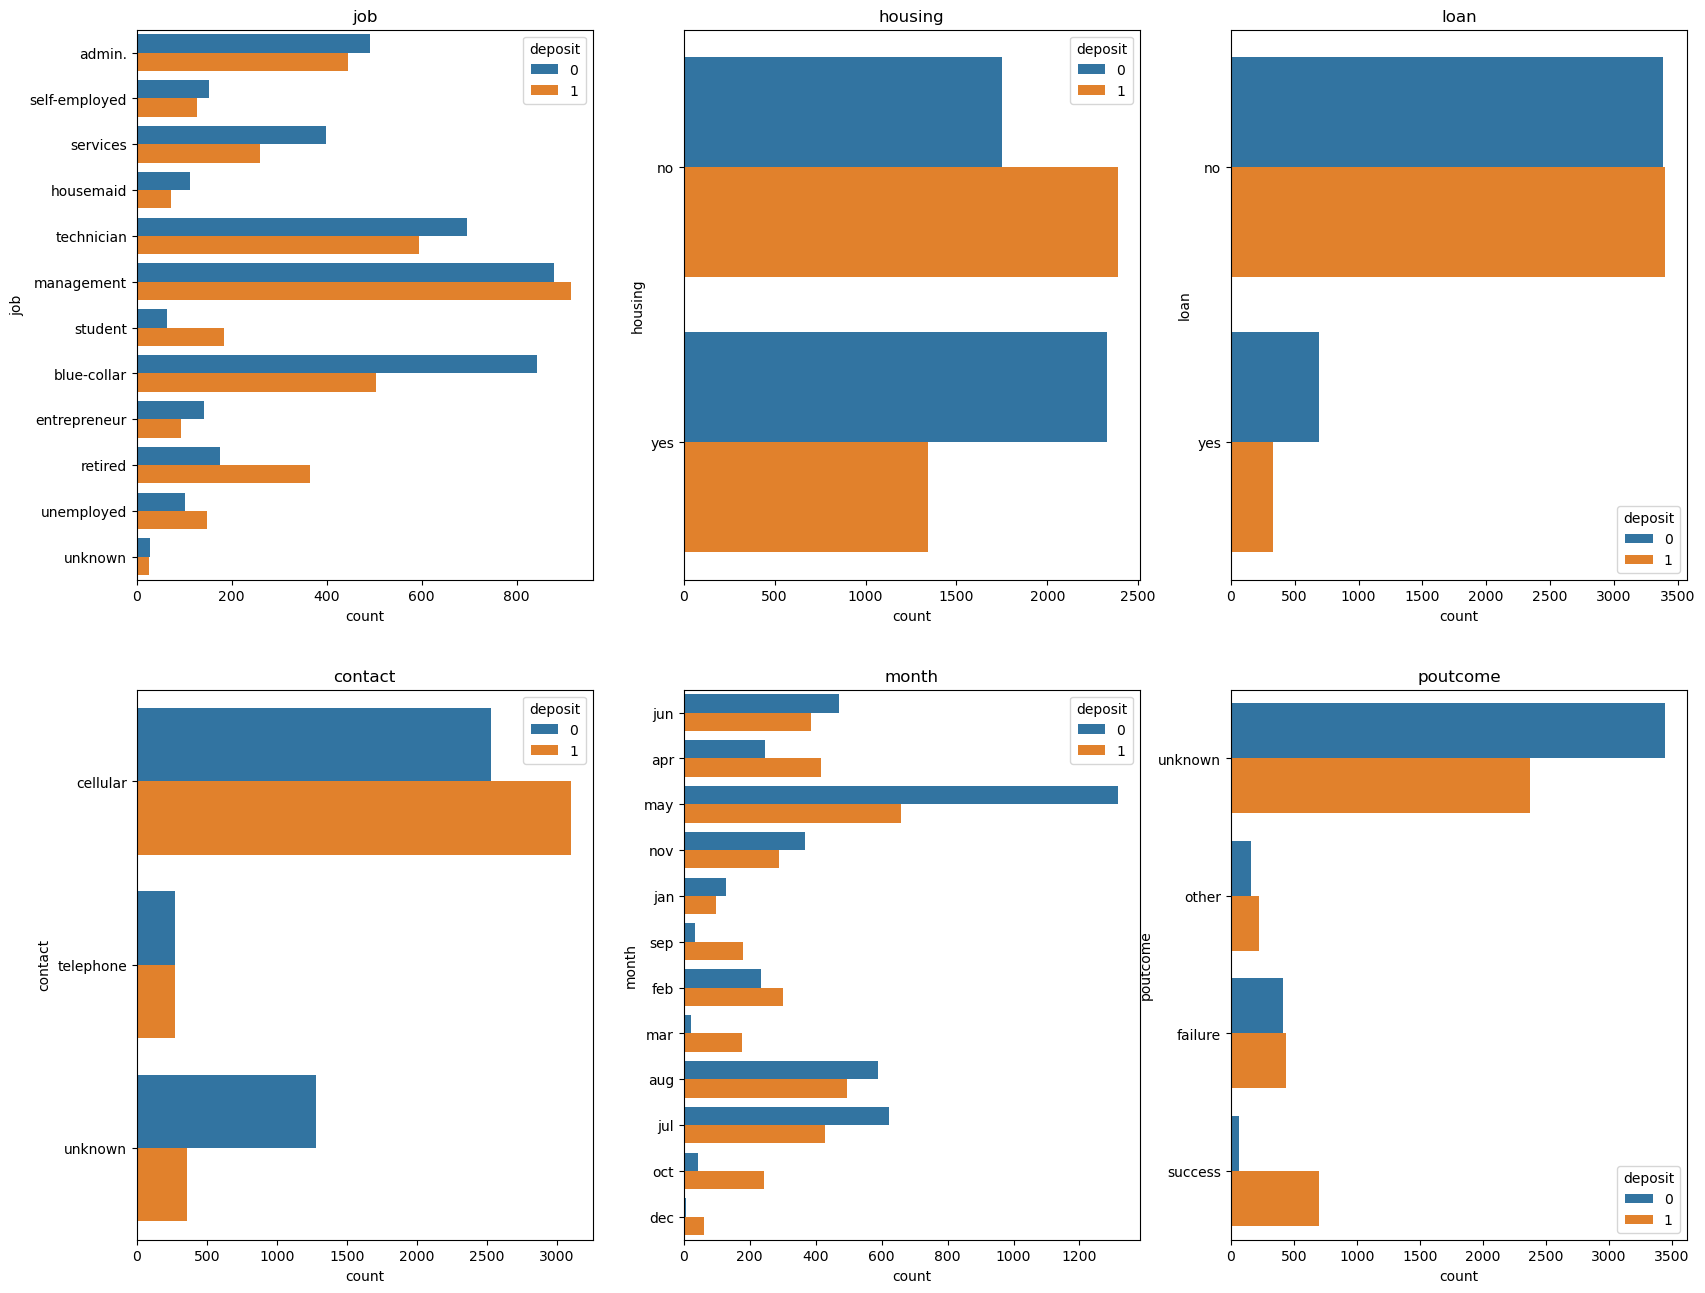

In [958]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']

plot_fig = 1
plt.figure(figsize=(20,50))
for col in cat_cols:
    ax = plt.subplot(6,3,plot_fig)
    sns.countplot(data=df, y=col, hue='deposit')
    plt.title(col)
    plot_fig += 1
plt.show()

- Nasabah dengan profesi management, technician dan blue-collar lebih banyak yang membuka deposito
- Nasabah yang memiliki kredit rumah lebih cenderung tidak membuka deposito
- Nasabah lebih banyak yang tidak memiliki pinjaman uang dan jumlahnya hampir sama antara yang membuka deposito dan tidak
- Nasabah yang membuka deposito lebih banyak yang dihubungi melalui cellular
- Bulan Mei adalah bulan terbanyak untuk mendapatkan nasabah

***Hubungan kolom numerik dengan label target***

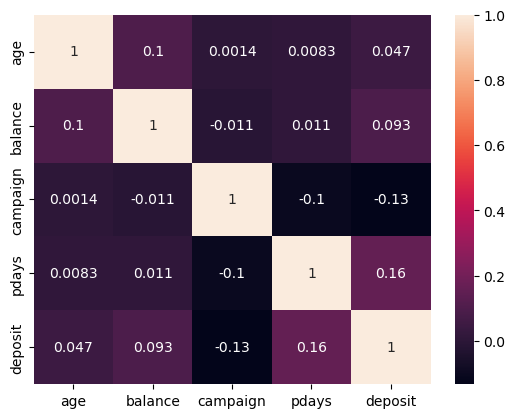

In [959]:
num_cols = df.select_dtypes(include='number').columns

sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

- Kolom yang memiliki korelasi tertinggi diantara yang lain dengan target adalah `pdays` meskipun nilai korelasinya tergolong lemah
- Kolom `balance` juga memiliki korelasi meskipun lemah

## **C. Data Cleaning**

### ***Handling Outlier***

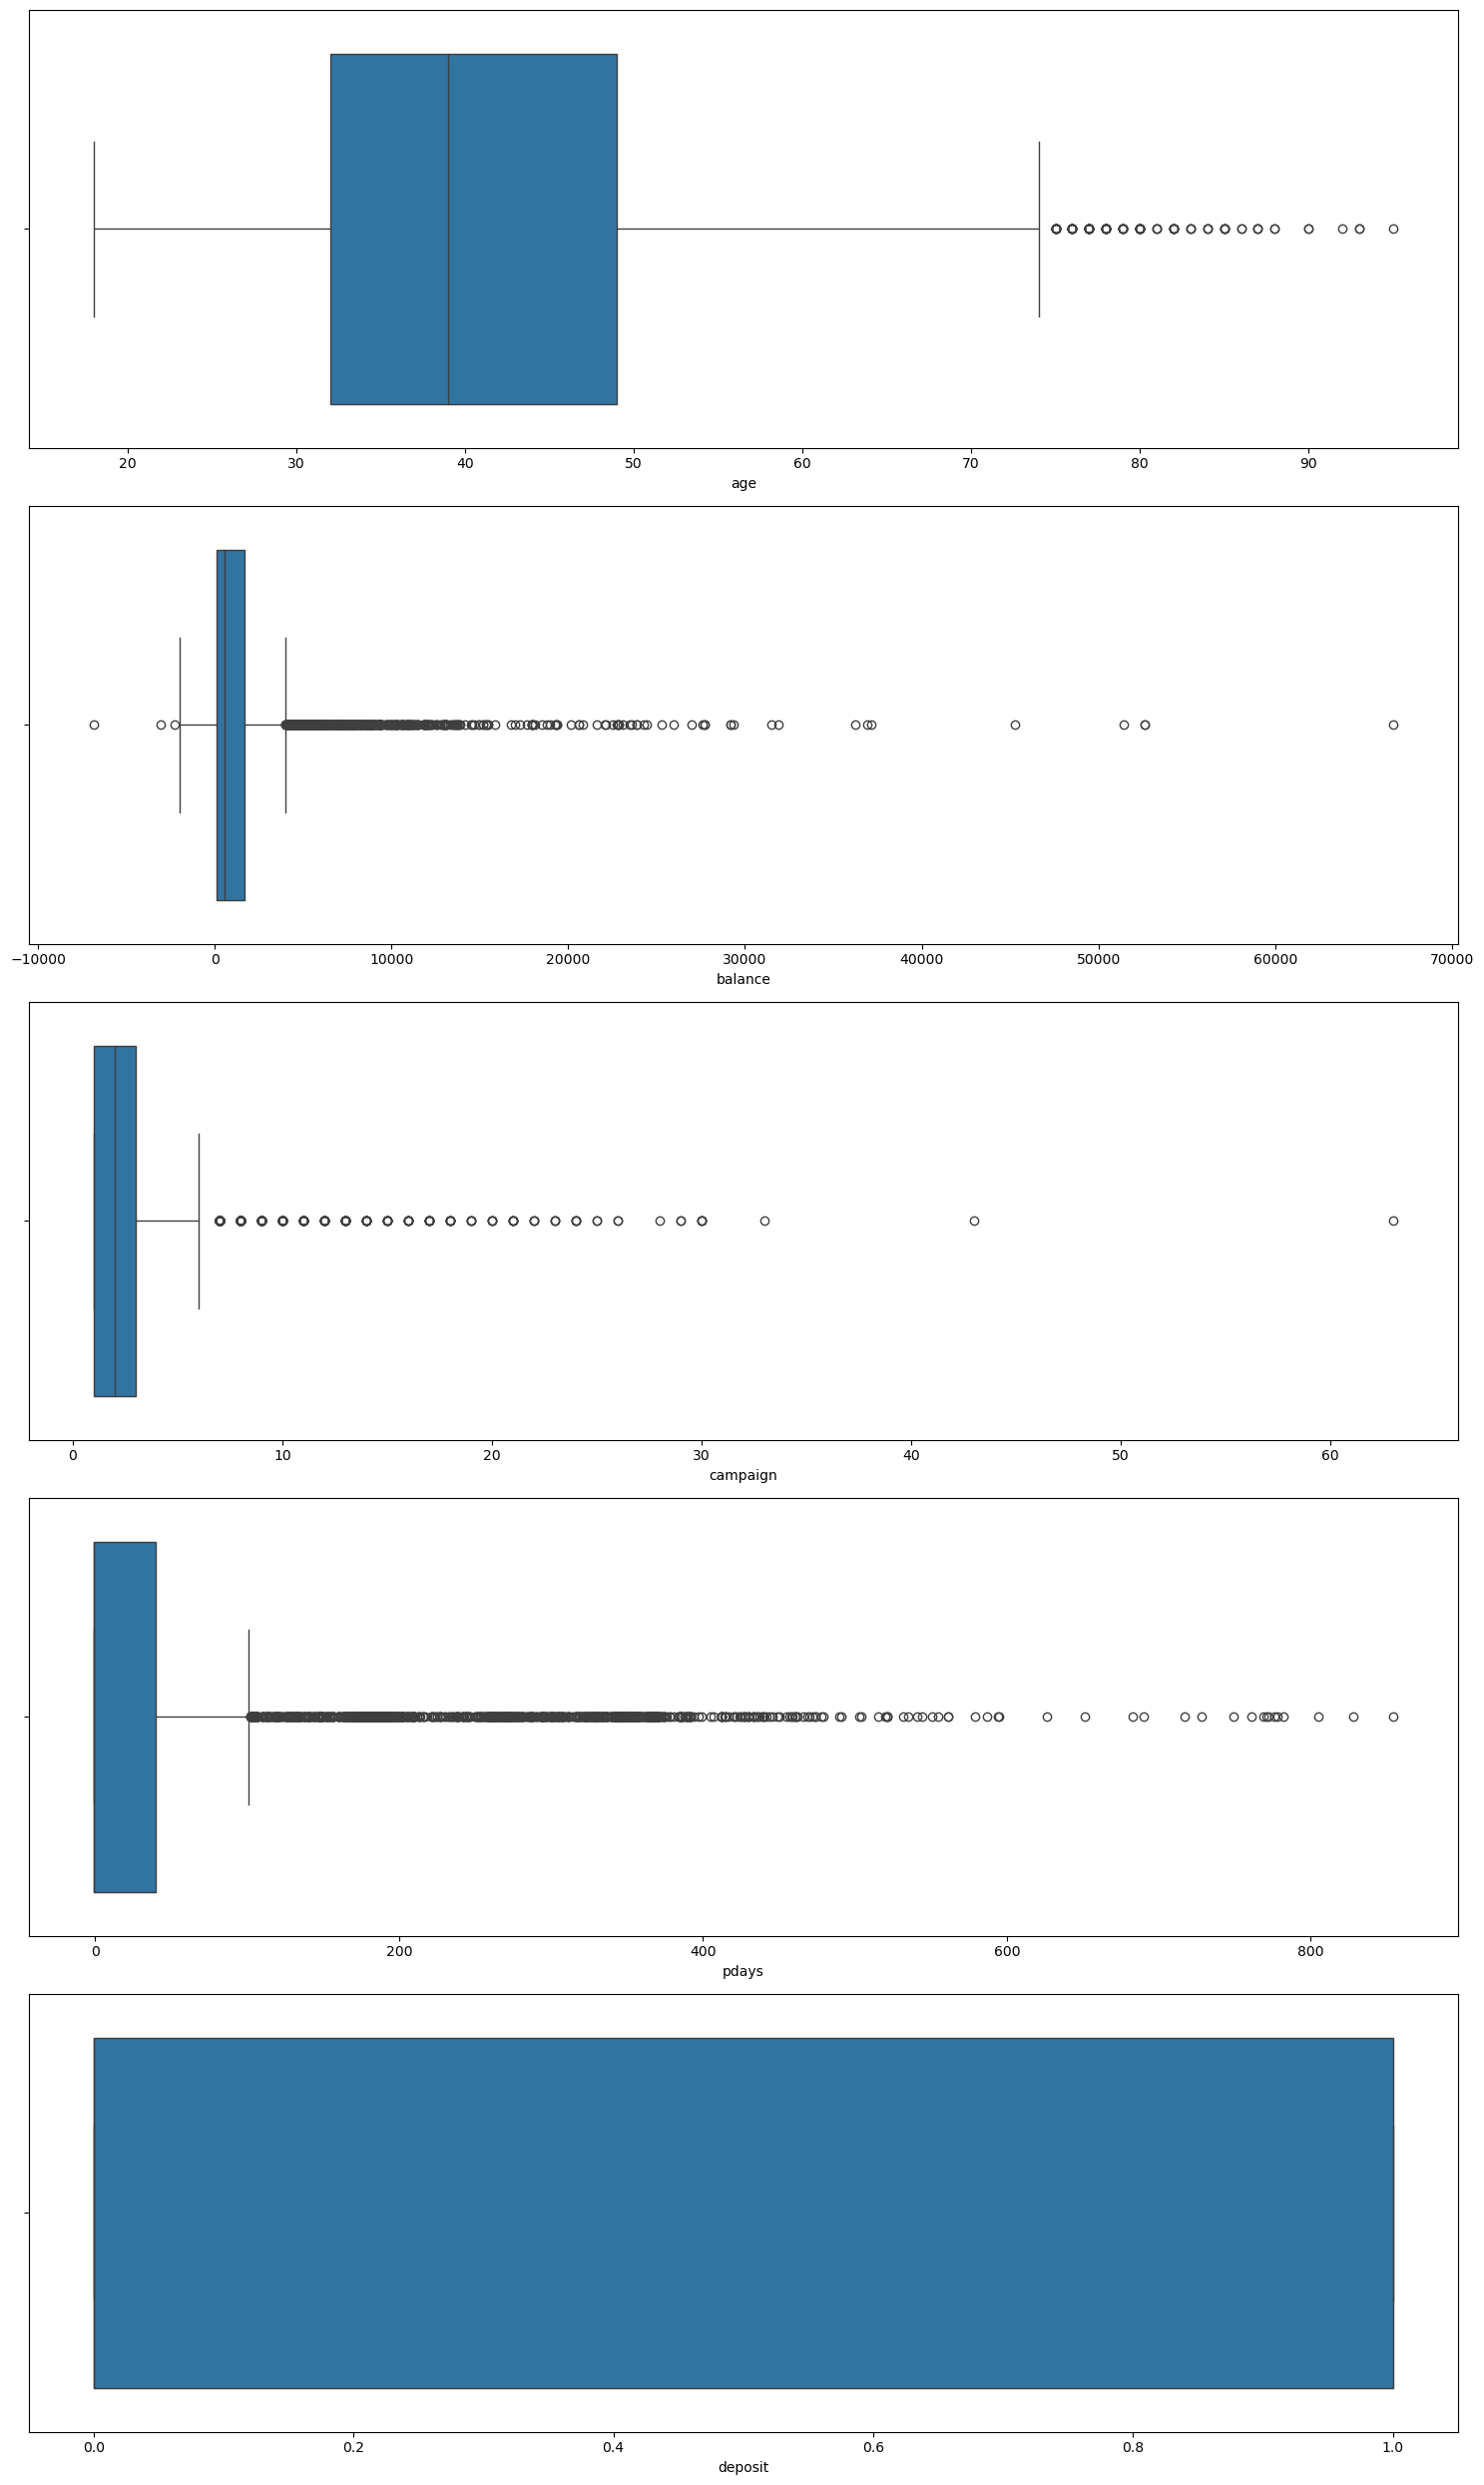

In [960]:
plt.figure(figsize=(15, 5*len(num_cols)))

for idx, col in enumerate(num_cols, 1):
  plt.subplot(len(num_cols), 1, idx)
  sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

- `balance` kurang dari 0 dan lebih dari 30.000

In [961]:
len(df[df['balance']<0]), len(df[df['balance']>30000])

(479, 10)

In [962]:
df.drop(df[(df['balance'] < 0) | (df['balance'] > 30000)].index, inplace=True)

- `campaign` lebih dari 30 kali

In [963]:
len(df[df['campaign']>30])

3

In [964]:
df.drop(df[df['campaign'] > 30].index, inplace=True)

- `pdays` lebih dari 450

In [965]:
len(df[df['pdays']>450])

52

In [966]:
df.drop(df[df['pdays'] > 450].index, inplace=True)

In [967]:
print(f'''
Jumlah Data Awal : 7813
Jumlah Data Setelah Dihapus Outliernya : {len(df)}
Jumlah Outlier yang Dihapus : {7813 - len(df)}
''')


Jumlah Data Awal : 7813
Jumlah Data Setelah Dihapus Outliernya : 7269
Jumlah Outlier yang Dihapus : 544



- Berdasarkan boxplot diatas outlier terdapat pada kolom `balance` `campaign` dan `pdays`
- Jumlah outlier yang dihapus : 544 Baris Data
- Outlier dihapus agar tidak menjadi noise saat membangun model

### ***Data Duplikat***

In [968]:
df.duplicated().sum()

np.int64(8)

- Menghapus data yang terduplikat saja

In [969]:
df.drop_duplicates(keep='first',inplace=True)

### ***Pengecekan Data Pada Setiap Kolom***

In [970]:
pd.DataFrame({
    "Column": df.columns,
    "Unique_Count": [df[col].nunique() for col in df.columns],
    "Unique_Sample": [df[col].unique()[:5] for col in df.columns],
    "Null": [df[col].isna().sum() for col in df.columns],
    "Unknown": [(df[col].str.upper()=="UNKNOWN").sum() if df[col].dtype == 'object' else 0 for col in df.columns]
})

,Column,Unique_Count,Unique_Sample,Null,Unknown
0,age,75,"[55, 51, 36, 37, 35]",0,0
1,job,12,"[admin., housemaid, technician, management, st...",0,53
2,balance,2797,"[1662, 3025, 205, 4803, 911]",0,0
3,housing,2,"[no, yes]",0,0
4,loan,2,"[no, yes]",0,0
5,contact,3,"[cellular, telephone, unknown]",0,1460
6,month,12,"[jun, may, nov, jan, sep]",0,0
7,campaign,29,"[2, 1, 4, 5, 3]",0,0
8,pdays,372,"[-1, 352, 21, 91, 186]",0,0
9,poutcome,4,"[unknown, other, failure, success]",0,5385


- Tidak ditemukan nilai null/nan dalam data
- Namun pada beberapa kolom terdapat nilai *unknown*
- *unknown* pada kolom `job` akan diimputasi pada tahap preprocessing
- *unknown* pada kolom `contact` akan dibiarkan karena jumlah tidak terlalu banyak
- Kolom `poutcome` tidak akan digunakan sebagai fitur karena *unknown* yang terlalu banyak 

### ***Cleaning Kolom*** `job`

In [971]:
df['job'].value_counts()

job
management       1693
blue-collar      1195
technician       1193
admin.            865
services          598
retired           525
self-employed     266
student           245
unemployed        235
entrepreneur      217
housemaid         176
unknown            53
Name: count, dtype: int64

- Mengubah nilai *unknown* pada kolom `job` menjadi nan untuk di imputasi pada tahap preprocessing

In [972]:
df['job'].replace('unknown', np.nan, inplace=True)

### ***Cleaning Kolom*** `poutcome`

In [973]:
df['poutcome'].value_counts()

poutcome
unknown    5385
failure     775
success     742
other       359
Name: count, dtype: int64

In [974]:
len(df[df['poutcome'] == 'unknown']) / len(df)

0.7416333838314282

- Kolom `poutcome` memiliki nilai *unknown* sebanyak 74%
- Karena jumlah yang terlalu banyak, maka kolom `poutcome` tidak akan digunakan

In [975]:
df.drop(columns='poutcome', inplace=True)

## **D. Train & Test Splitting**

In [976]:
X = df.drop(columns='deposit')
y = df['deposit']

display(X.head(), y.head())

,age,job,balance,housing,loan,contact,month,campaign,pdays
0,55,admin.,1662,no,no,cellular,jun,2,-1
2,51,admin.,3025,no,no,cellular,may,1,352
4,36,housemaid,205,yes,no,telephone,nov,4,-1
6,37,admin.,4803,no,no,cellular,jan,2,-1
7,36,technician,911,yes,yes,cellular,may,2,21


0    1
2    1
4    0
6    1
7    1
Name: deposit, dtype: int64

In [977]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## **E. Preprocessing**

- Setelah mencoba berbagai feature engineering
- Imputasi cukup dengan SimpleImputer karena jumlah null yang tidak terlalu banyak
- Encoding dengan OneHotEncoder lebih cocok agar mudah dijelaskan dan juga memiliki nilai yang lebih stabil dibanding OrdinalEncoder dan BinaryEncoder
- Scaling menggunakan RobustScaler lebih cocok karena banyak data skew

In [978]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

num_features = ['age','balance','campaign','pdays']
cat_features = ['contact','month']
cat_features2 = ['housing','loan']

preprocessing = ColumnTransformer([
    ('impute_job', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot_job', OneHotEncoder(sparse_output=False))
    ]), ['job']),
    ('onehot_cat', OneHotEncoder(sparse_output=False), cat_features),
    ('onehot_cat2', OneHotEncoder(drop='first', sparse_output=False), cat_features2),
    ('robust', RobustScaler(), num_features)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
preprocessing

,transformers,"[('impute_job', ...), ('onehot_cat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


## **F. Model Selection**

In [979]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(random_state=0),
    'dtree': DecisionTreeClassifier(random_state=0),
    'voting': VotingClassifier([
        ('knn', KNeighborsClassifier()),
        ('logistic', LogisticRegression(random_state=0)),
        ('dtree', DecisionTreeClassifier(random_state=0)),
    ]),
    'stacking': StackingClassifier([
        ('knn', KNeighborsClassifier()),
        ('logistic', LogisticRegression(random_state=0)),
        ('dtree', DecisionTreeClassifier(random_state=0)),
    ]),
    'bagging': BaggingClassifier(random_state=0),
    'rf': RandomForestClassifier(random_state=0),
    'xgb': XGBClassifier(random_state=0),
    'lgbm': lgb.LGBMClassifier(random_state=0)
}

In [980]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [981]:
from sklearn.metrics import fbeta_score, make_scorer

scorer = {
    'f1': 'f1',
    'f2': make_scorer(fbeta_score, beta=2),
}

In [982]:
from sklearn.model_selection import cross_validate

results = {}

for model_name, model in models.items():
    pipe_model = Pipeline([
        ('preprocessing', preprocessing),
        ('modeling', model)
    ])

    cv_score = cross_validate(pipe_model, X_train, y_train, cv=kfold, scoring=scorer, return_train_score=True)

    results[model_name] = {
        'model': model_name,
        'train_f1_mean': cv_score['train_f1'].mean().round(3),
        'test_f1_mean': cv_score['test_f1'].mean().round(3),
        'train_f1_std':  cv_score['train_f1'].std().round(3),
        'test_f1_std':  cv_score['test_f1'].std().round(3),
        'train_f2_mean': cv_score['train_f2'].mean().round(3),
        'test_f2_mean': cv_score['test_f2'].mean().round(3),
        'train_f2_std':  cv_score['train_f2'].std().round(3),
        'test_f2_std':  cv_score['test_f2'].std().round(3),
    }

[LightGBM] [Info] Number of positive: 2265, number of negative: 2381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 4646, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487516 -> initscore=-0.049946
[LightGBM] [Info] Start training from score -0.049946
[LightGBM] [Info] Number of positive: 2265, number of negative: 2381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 4646, number of used features: 32
[LightGBM] [Info] [binary:

In [983]:
df_best_model = pd.DataFrame(results).T.reset_index(drop=True)
df_best_model.sort_values(by=['test_f1_mean','test_f1_std'], ascending=[False,True])

,model,train_f1_mean,test_f1_mean,train_f1_std,test_f1_std,train_f2_mean,test_f2_mean,train_f2_std,test_f2_std
4,stacking,0.769,0.678,0.011,0.017,0.754,0.665,0.009,0.028
8,lgbm,0.803,0.675,0.004,0.018,0.77,0.647,0.005,0.023
6,rf,1.0,0.673,0.0,0.015,1.0,0.658,0.0,0.022
7,xgb,0.886,0.667,0.004,0.01,0.862,0.646,0.005,0.015
1,logistic,0.67,0.664,0.002,0.011,0.666,0.66,0.002,0.022
3,voting,0.838,0.664,0.003,0.011,0.822,0.651,0.006,0.021
5,bagging,0.976,0.642,0.003,0.009,0.966,0.611,0.004,0.011
0,knn,0.752,0.64,0.004,0.017,0.733,0.624,0.006,0.023
2,dtree,1.0,0.616,0.0,0.015,1.0,0.619,0.0,0.02


- Stacking dan Light Gradient Boosting Machine (LGBM) yang akan menjadi model pilihan

- Setelah melakukan tuning pada kedua kandidat model
- LGBM memiliki AUC score yang lebih baik
- LGBM juga memiliki hasil akhir yang lebih baik
- Sehingga LGBM menjadi model pilihan

### **Base Model Evaluation**

In [984]:
from sklearn.metrics import precision_score, recall_score, f1_score

pipe_base = Pipeline([
    ('preprocessing', preprocessing),
    ('modeling', models['lgbm'])
])
pipe_base.fit(X_train, y_train)

y_train_base_pred = pipe_base.predict(X_train)
y_test_base_pred = pipe_base.predict(X_test)

base_score = {
    'train_base': {'precision': round(precision_score(y_train, y_train_base_pred), 3),
                   'recall': round(recall_score(y_train, y_train_base_pred), 3),
                   'f1': round(f1_score(y_train, y_train_base_pred), 3),
                   'f2': round(fbeta_score(y_train, y_train_base_pred, beta=2), 3)},
    'test_base': {'precision': round(precision_score(y_test, y_test_base_pred), 3),
                  'recall': round(recall_score(y_test, y_test_base_pred), 3),
                  'f1': round(f1_score(y_test, y_test_base_pred), 3),
                  'f2': round(fbeta_score(y_test, y_test_base_pred, beta=2), 3)},
}

df_base_score = pd.DataFrame(base_score)
df_base_score

[LightGBM] [Info] Number of positive: 2832, number of negative: 2976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5808, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487603 -> initscore=-0.049597
[LightGBM] [Info] Start training from score -0.049597


,train_base,test_base
precision,0.844,0.742
recall,0.726,0.658
f1,0.781,0.698
f2,0.747,0.673


In [985]:
from sklearn.metrics import classification_report

report_base = classification_report(y_test, y_test_base_pred)

print(f'''
Report Base Model
{report_base}
''')


Report Base Model
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       745
           1       0.74      0.66      0.70       708

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.72      1453
weighted avg       0.72      0.72      0.72      1453




ROC AUC Test : 0.775


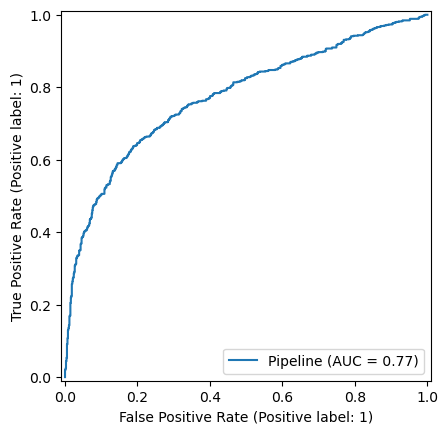

In [986]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_test_base_proba = pipe_base.predict_proba(X_test)[:,1]
test_base_auc = roc_auc_score(y_test, y_test_base_proba)

print(f'ROC AUC Test : {test_base_auc:.3f}')
RocCurveDisplay.from_estimator(pipe_base, X_test, y_test)

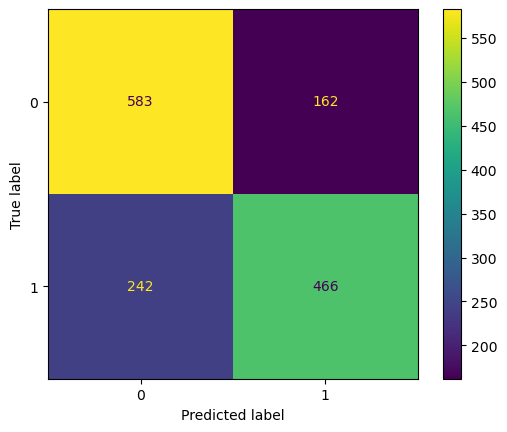

In [987]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_base = confusion_matrix(y_test, y_test_base_pred)
ConfusionMatrixDisplay(cm_base).plot()

In [988]:
def analyze_cost(cm):
    tn, fp, fn, tp = cm.reshape(-1)
    total_samples = tn + fp + fn + tp
    
    tp_revenue = tp * 14.25
    tn_savings = tn * 5
    fp_cost = fp * 5
    fn_cost = fn * 14.25
    
    # Net result
    total_benefit = tp_revenue + tn_savings
    total_cost = fp_cost + fn_cost
    net_profit = total_benefit - total_cost
    
    summary = f'''
    Total Sample: {total_samples}
    
    Benefits:
    - TP Revenue: € {tp_revenue:,.2f} (from {tp} successful calls)
    - TN Savings: € {tn_savings:,.2f} (from {tn} avoided calls)
    - Total Benefit: € {total_benefit:,.2f}
    
    Costs:
    - FP Cost: € {fp_cost:,.2f} (from {fp} wasted calls)
    - FN Cost: € {fn_cost:,.2f} (from {fn} missed opportunities)
    - Total Cost: € {total_cost:,.2f}
    
    Net Profit: € {net_profit:,.2f}
    '''
    
    return summary

In [989]:
print(analyze_cost(cm_base))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 6,640.50 (from 466 successful calls)
    - TN Savings: € 2,915.00 (from 583 avoided calls)
    - Total Benefit: € 9,555.50

    Costs:
    - FP Cost: € 810.00 (from 162 wasted calls)
    - FN Cost: € 3,448.50 (from 242 missed opportunities)
    - Total Cost: € 4,258.50

    Net Profit: € 5,297.00
    


## **G. Hyperparameter Tuning**

In [990]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# # Hyperparameter space
# param_dist = {
#     'modeling__num_leaves': range(10,21),
#     'modeling__max_depth': range(3,11),
#     'modeling__learning_rate': [0.01, 0.05, 0.1],
#     'modeling__n_estimators': [100, 300, 500],
#     'modeling__objective': ['binary'],
#     'modeling__class_weight': ['balanced'],
#     'modeling__min_child_samples': range(10,21),
#     'modeling__importance_type': ['split','gain'],
# }

# # Pipeline tuning
# pipe_tuning = Pipeline([
#     ('preprocessing', preprocessing),
#     ('modeling', models['lgbm'])
# ])

# # Grid search
# gridsearch = GridSearchCV(
#     pipe_tuning,
#     param_grid=param_dist,
#     scoring='f1',
#     cv=kfold,
#     n_jobs=-1
# )

# gridsearch.fit(X_train, y_train)

# print(f'''
# Best Params : {gridsearch.best_params_}
# Best Score : {gridsearch.best_score_}
# ''')

In [991]:
# pipe_tuned = gridsearch.best_estimator_
# pipe_tuned

- Save & Open Tuned Model (Jika notebook diakses menggunakan **VSCode / Local Directory**)

In [992]:
# import pickle

# Saving model
# with open('lgbm_tuning_17.hyp', 'wb') as f:
#     pickle.dump(pipe_tuned, f)

In [993]:
import pickle

# Opening Model
with open('lgbm_grid_tune_9.hyp', 'rb') as f:
    pipe_tuned = pickle.load(f)

### **Tuned Model Evaluation**

In [994]:
pipe_tuned

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_job', ...), ('onehot_month', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [995]:
pipe_tuned.fit(X_train, y_train)

y_train_tuned_pred = pipe_tuned.predict(X_train)
y_test_tuned_pred = pipe_tuned.predict(X_test)

tuned_score = {
    'train_tuned': {'precision': round(precision_score(y_train, y_train_tuned_pred), 3),
                   'recall': round(recall_score(y_train, y_train_tuned_pred), 3),
                   'f1': round(f1_score(y_train, y_train_tuned_pred), 3),
                   'f2': round(fbeta_score(y_train, y_train_tuned_pred, beta=2), 3)},
    'test_tuned': {'precision': round(precision_score(y_test, y_test_tuned_pred), 3),
                  'recall': round(recall_score(y_test, y_test_tuned_pred), 3),
                  'f1': round(f1_score(y_test, y_test_tuned_pred), 3),
                  'f2': round(fbeta_score(y_test, y_test_tuned_pred, beta=2), 3)},
}

df_tuned_score = pd.DataFrame(tuned_score)
df_tuned_score

[LightGBM] [Info] Number of positive: 2832, number of negative: 2976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5808, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,train_tuned,test_tuned
precision,0.762,0.735
recall,0.641,0.658
f1,0.696,0.694
f2,0.662,0.672


In [996]:
report_tuned = classification_report(y_test, y_test_tuned_pred)

print(f'''
Report Tuned Model
{report_tuned}
''')


Report Tuned Model
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       745
           1       0.74      0.66      0.69       708

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.72      1453
weighted avg       0.72      0.72      0.72      1453




ROC AUC Test : 0.773


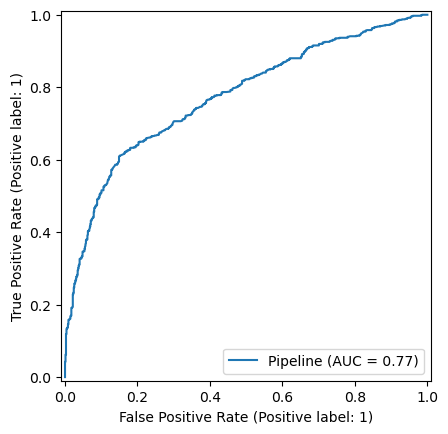

In [997]:
y_test_tuned_proba = pipe_tuned.predict_proba(X_test)[:,1]
test_tuned_auc = roc_auc_score(y_test, y_test_tuned_proba)

print(f'ROC AUC Test : {test_tuned_auc:.3f}')
RocCurveDisplay.from_estimator(pipe_tuned, X_test, y_test)

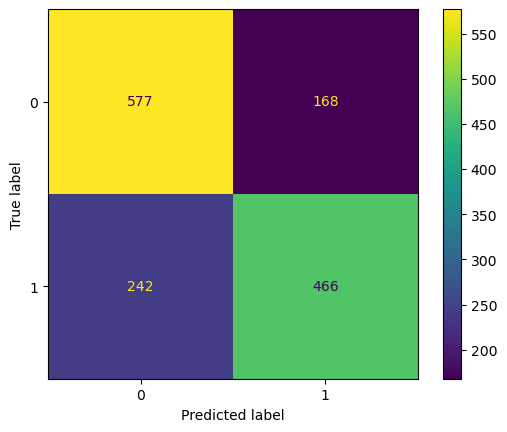

In [998]:
cm_tuned = confusion_matrix(y_test, y_test_tuned_pred)
ConfusionMatrixDisplay(cm_tuned).plot()

In [999]:
print(analyze_cost(cm_tuned))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 6,640.50 (from 466 successful calls)
    - TN Savings: € 2,885.00 (from 577 avoided calls)
    - Total Benefit: € 9,525.50

    Costs:
    - FP Cost: € 840.00 (from 168 wasted calls)
    - FN Cost: € 3,448.50 (from 242 missed opportunities)
    - Total Cost: € 4,288.50

    Net Profit: € 5,237.00
    


- Setelah tuning dilakukan, efek overfitting jauh berkurang
- Meskipun AUC Score menurun sangat sedikit (0.002)
- Tetapi FN belum berhasil di tekan
- Selanjutnya akan dilakukan threshold optimization agar ambang batas probabilitas lebih cocok dengan metrik yang digunakan

## **H. Threshold Optimization**

In [1000]:
from sklearn.model_selection import TunedThresholdClassifierCV

threshold_optimized_model = TunedThresholdClassifierCV(
    estimator=pipe_tuned,
    scoring='f1',
    cv=kfold,
    store_cv_results=True
)

threshold_optimized_model.fit(X_train, y_train)

print(f'Best Threshold : {threshold_optimized_model.best_threshold_:.2f}')

[LightGBM] [Info] Number of positive: 2832, number of negative: 2976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5808, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

### **Optimized Threshold Evaluation**

In [1001]:
y_train_thres_pred = threshold_optimized_model.predict(X_train)
y_test_thres_pred = threshold_optimized_model.predict(X_test)

thres_score = {
    'train_thres': {'precision': round(precision_score(y_train, y_train_thres_pred), 3),
                   'recall': round(recall_score(y_train, y_train_thres_pred), 3),
                   'f1': round(f1_score(y_train, y_train_thres_pred), 3),
                   'f2': round(fbeta_score(y_train, y_train_thres_pred, beta=2), 3)},
    'test_thres': {'precision': round(precision_score(y_test, y_test_thres_pred), 3),
                  'recall': round(recall_score(y_test, y_test_thres_pred), 3),
                  'f1': round(f1_score(y_test, y_test_thres_pred), 3),
                  'f2': round(fbeta_score(y_test, y_test_thres_pred, beta=2), 3)},
}

df_thres_score = pd.DataFrame(thres_score)
df_thres_score

,train_thres,test_thres
precision,0.607,0.584
recall,0.870,0.857
f1,0.715,0.695
f2,0.801,0.784


In [1002]:
report_thres = classification_report(y_test, y_test_thres_pred)

print(f'''
Report Tuned Threshold Model
{report_thres}
''')


Report Tuned Threshold Model
              precision    recall  f1-score   support

           0       0.76      0.42      0.54       745
           1       0.58      0.86      0.69       708

    accuracy                           0.63      1453
   macro avg       0.67      0.64      0.62      1453
weighted avg       0.67      0.63      0.61      1453




ROC AUC Test : 0.773


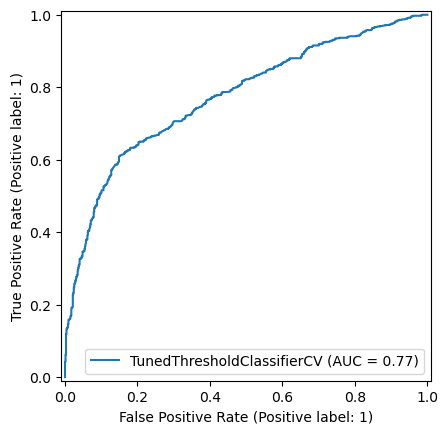

In [1003]:
y_test_thres_proba = threshold_optimized_model.predict_proba(X_test)[:,1]
test_thres_auc = roc_auc_score(y_test, y_test_thres_proba)

print(f'ROC AUC Test : {test_thres_auc:.3f}')
RocCurveDisplay.from_estimator(threshold_optimized_model, X_test, y_test)

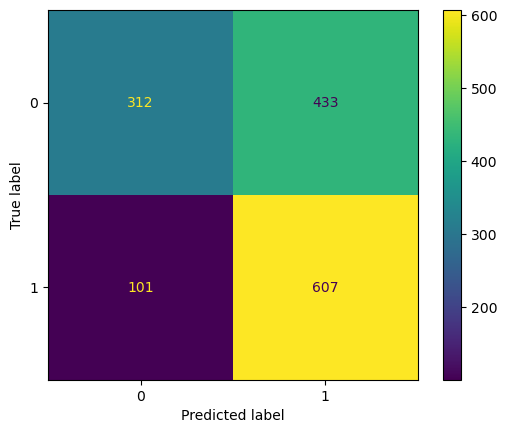

In [1004]:
cm_thres = confusion_matrix(y_test, y_test_thres_pred)
ConfusionMatrixDisplay(cm_thres).plot()

In [1005]:
print(analyze_cost(cm_thres))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 8,649.75 (from 607 successful calls)
    - TN Savings: € 1,560.00 (from 312 avoided calls)
    - Total Benefit: € 10,209.75

    Costs:
    - FP Cost: € 2,165.00 (from 433 wasted calls)
    - FN Cost: € 1,439.25 (from 101 missed opportunities)
    - Total Cost: € 3,604.25

    Net Profit: € 6,605.50
    


- Threshold optimal : 0.39
- Setelah optimisasi threshold dilakukan, test score meningkat signifikan
- Terutama pada FN (Recall & F2) score nya berhasil ditingkatkan
- Dengan metrik F1 untuk pengoptimalan threshold
- Walaupun FN ditekan dan lebih banyak label 1 yang lolos, dan accuracy yang sedikit menurun
- Namun secara cost jauh lebih murah dibanding sebelumnya

## **I. Model Base & Tuned Comparison**

In [1006]:
print('''======================================
Base Model Score :''')
display(df_base_score)
print('''======================================
Tuned Model Score :''')
display(df_tuned_score)
print('''======================================
Tuned Threshold Model Score :''')
display(df_thres_score)

Base Model Score :


,train_base,test_base
precision,0.844,0.742
recall,0.726,0.658
f1,0.781,0.698
f2,0.747,0.673


Tuned Model Score :


,train_tuned,test_tuned
precision,0.762,0.735
recall,0.641,0.658
f1,0.696,0.694
f2,0.662,0.672


Tuned Threshold Model Score :


,train_thres,test_thres
precision,0.607,0.584
recall,0.870,0.857
f1,0.715,0.695
f2,0.801,0.784


In [1007]:
print(f'''
Report Base Model
{report_base}

Report Tuned Model
{report_tuned}

Report Tuned Threshold Model
{report_thres}
''')


Report Base Model
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       745
           1       0.74      0.66      0.70       708

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.72      1453
weighted avg       0.72      0.72      0.72      1453


Report Tuned Model
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       745
           1       0.74      0.66      0.69       708

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.72      1453
weighted avg       0.72      0.72      0.72      1453


Report Tuned Threshold Model
              precision    recall  f1-score   support

           0       0.76      0.42      0.54       745
           1       0.58      0.86      0.69       708

    accuracy                           0.63      1453
   macro avg       0.67      0.64      0.62      1453
weigh

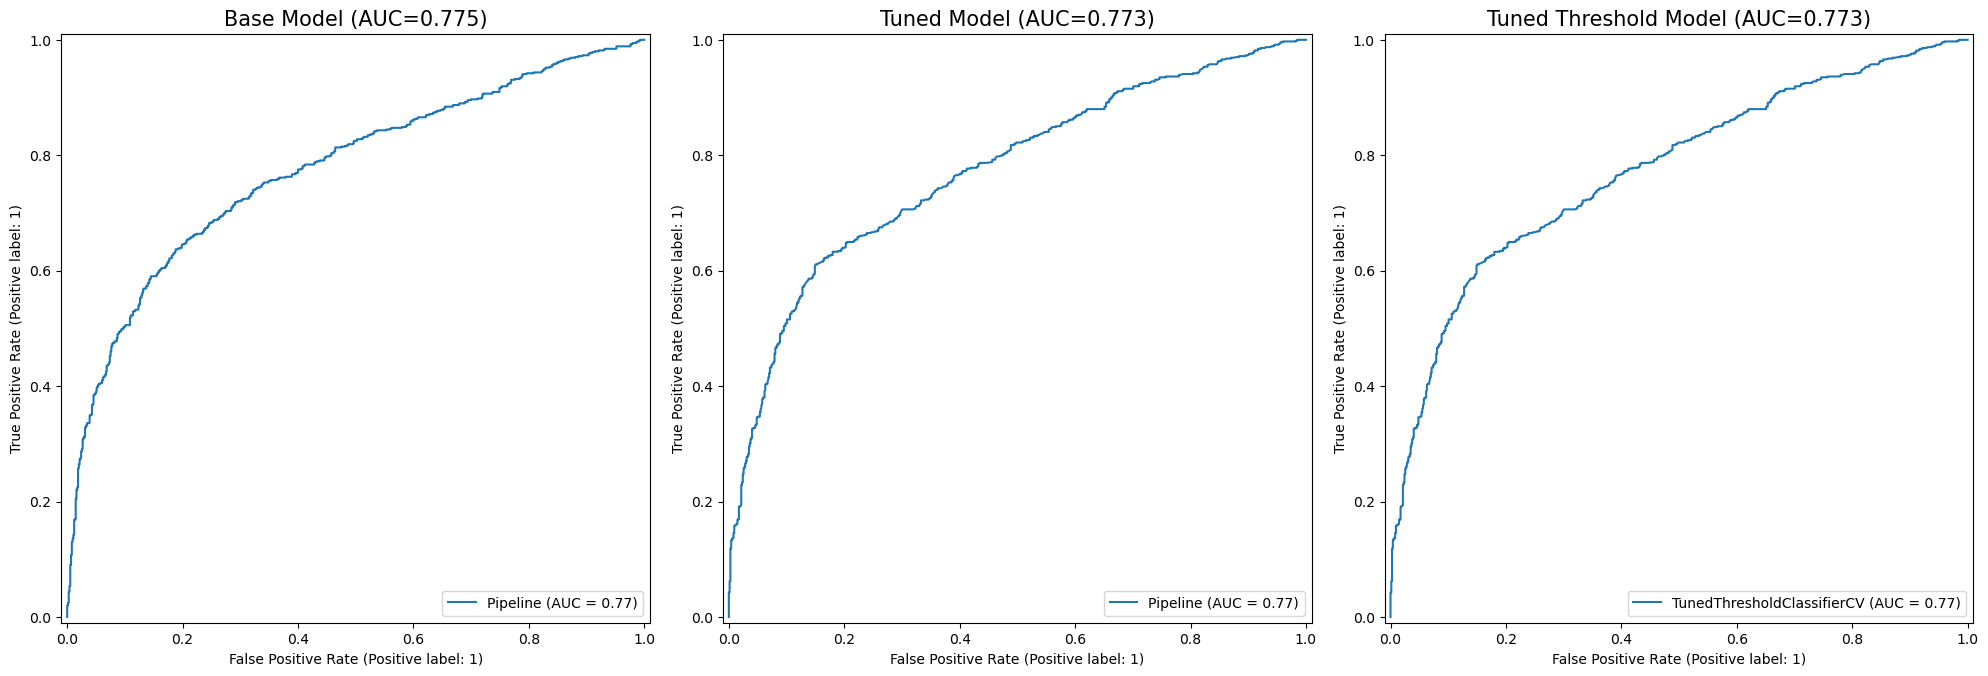

In [1008]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

RocCurveDisplay.from_estimator(pipe_base, X_test, y_test, ax=axes[0])
axes[0].set_title(f'Base Model (AUC={test_base_auc:.3f})', fontsize=15)

RocCurveDisplay.from_estimator(pipe_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title(f'Tuned Model (AUC={test_tuned_auc:.3f})', fontsize=15)

RocCurveDisplay.from_estimator(threshold_optimized_model, X_test, y_test, ax=axes[2])
axes[2].set_title(f'Tuned Threshold Model (AUC={test_thres_auc:.3f})', fontsize=15)

plt.tight_layout()
plt.show()

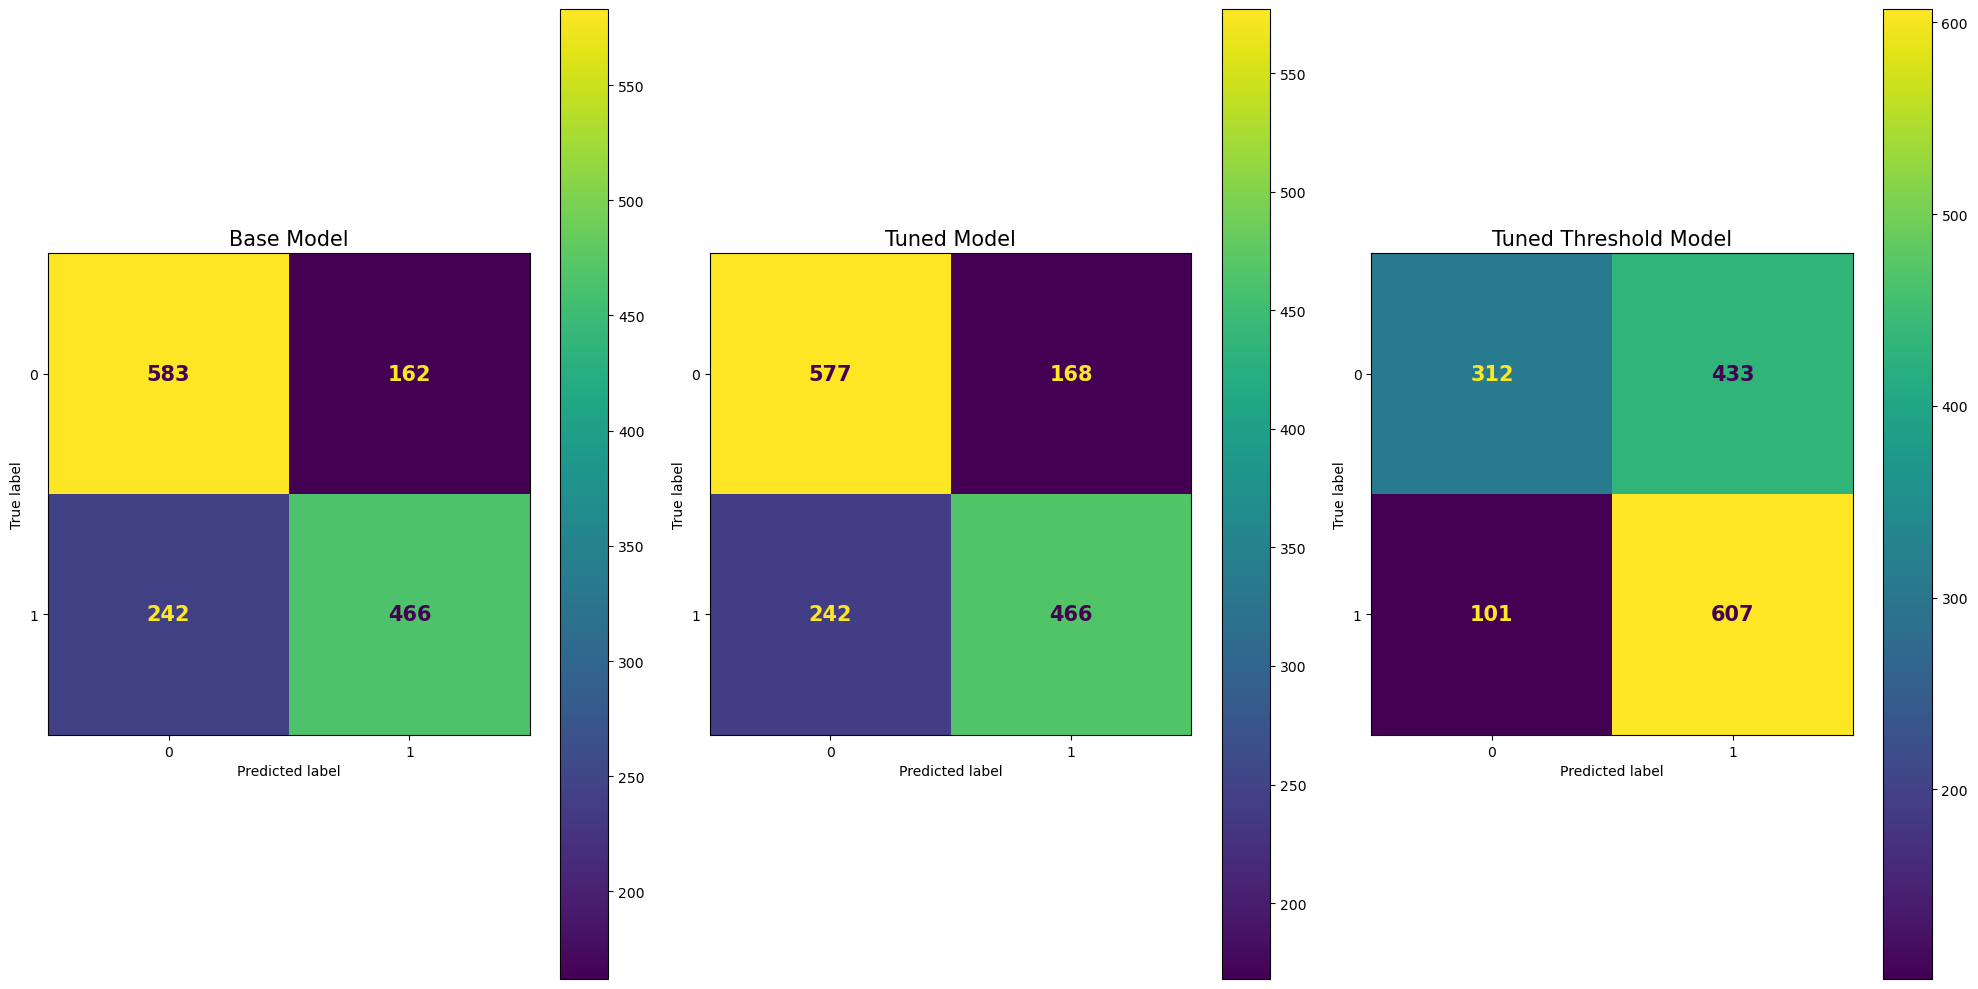

In [1009]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
text_format = {'size': 15, 'weight': 'bold'}

ConfusionMatrixDisplay(cm_base).plot(ax=axes[0], text_kw=text_format)
axes[0].set_title('Base Model', fontsize=15)

ConfusionMatrixDisplay(cm_tuned).plot(ax=axes[1], text_kw=text_format)
axes[1].set_title('Tuned Model', fontsize=15)

ConfusionMatrixDisplay(cm_thres).plot(ax=axes[2], text_kw=text_format)
axes[2].set_title('Tuned Threshold Model', fontsize=15)

plt.tight_layout()
plt.show()

In [1010]:
print(f'''
======================================
Base Model Cost :
{analyze_cost(cm_base)}
======================================
Tuned Model Cost :
{analyze_cost(cm_tuned)}
======================================
Tuned Threshold Model Cost :
{analyze_cost(cm_thres)}
''')


Base Model Cost :

    Total Sample: 1453

    Benefits:
    - TP Revenue: € 6,640.50 (from 466 successful calls)
    - TN Savings: € 2,915.00 (from 583 avoided calls)
    - Total Benefit: € 9,555.50

    Costs:
    - FP Cost: € 810.00 (from 162 wasted calls)
    - FN Cost: € 3,448.50 (from 242 missed opportunities)
    - Total Cost: € 4,258.50

    Net Profit: € 5,297.00
    
Tuned Model Cost :

    Total Sample: 1453

    Benefits:
    - TP Revenue: € 6,640.50 (from 466 successful calls)
    - TN Savings: € 2,885.00 (from 577 avoided calls)
    - Total Benefit: € 9,525.50

    Costs:
    - FP Cost: € 840.00 (from 168 wasted calls)
    - FN Cost: € 3,448.50 (from 242 missed opportunities)
    - Total Cost: € 4,288.50

    Net Profit: € 5,237.00
    
Tuned Threshold Model Cost :

    Total Sample: 1453

    Benefits:
    - TP Revenue: € 8,649.75 (from 607 successful calls)
    - TN Savings: € 1,560.00 (from 312 avoided calls)
    - Total Benefit: € 10,209.75

    Costs:
    - FP Cost:

- Dari perbandingan sebelum tuning dan sesudah hingga optimasi threshold diatas
- Setelah tuning dilakukan dan threshold yang optimal, efek overfitting berhasil di kurangi
- Juga score yang meningkat signifikan setelah optimasi threshold dilakukan
- Cost berhasil diminimalisir dan lebih murah dari sebelumnya
- Benefit yang lebih signifikan setelah tuning dan optimasi threshold

In [1011]:
# Menyimpan model terbaik

best_model = threshold_optimized_model
best_model

,estimator,Pipeline(step...om_state=0))])
,scoring,'f1'
,response_method,'auto'
,thresholds,100
,cv,StratifiedKFo... shuffle=True)
,refit,True
,n_jobs,None
,random_state,None
,store_cv_results,True
,transformers,"[('impute_job', ...), ('onehot_month', ...), ...]"
,remainder,'passthrough'


## **J. Feature Importances**

- Split -> seberapa sering fitur digunakan untuk membagi node
- Gain -> seberapa besar kontribusi peningkatan accuracy tiap kali fitur dipakai

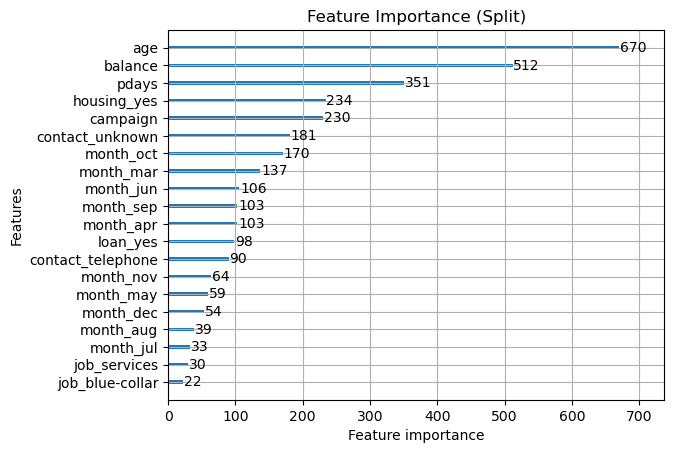

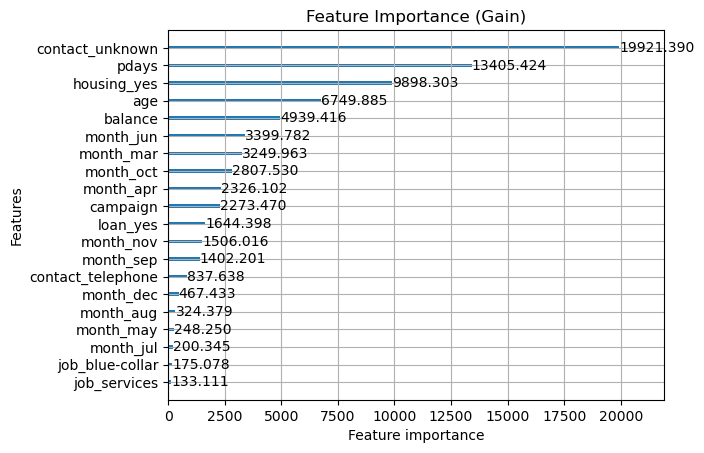

In [1012]:
lgb.plot_importance(pipe_tuned['modeling'], importance_type='split', max_num_features=20)
plt.title('Feature Importance (Split)')
plt.show()

lgb.plot_importance(pipe_tuned['modeling'], importance_type='gain', max_num_features=20)
plt.title('Feature Importance (Gain)')
plt.show()

- Prediksi deposit nasabah sangat dipengaruhi oleh faktor keuangan (*balance*, *housing loan*), kontak terakhir (*pdays*), dan umur (*age*)
- Cara kontak (*contact_unknown*) meski jarang terjadi, tetapi punya pengaruh besar pada keputusan nasabah
- Faktor waktu (bulan kontak) memang berperan, tapi tidak sekuat faktor keuangan dan kontak terakhir
- Variabel pekerjaan (*job*) ternyata hampir tidak terlalu relevan dalam prediksi

## **K. Model Explanation (SHAP)**

c:\ProgramData\miniconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


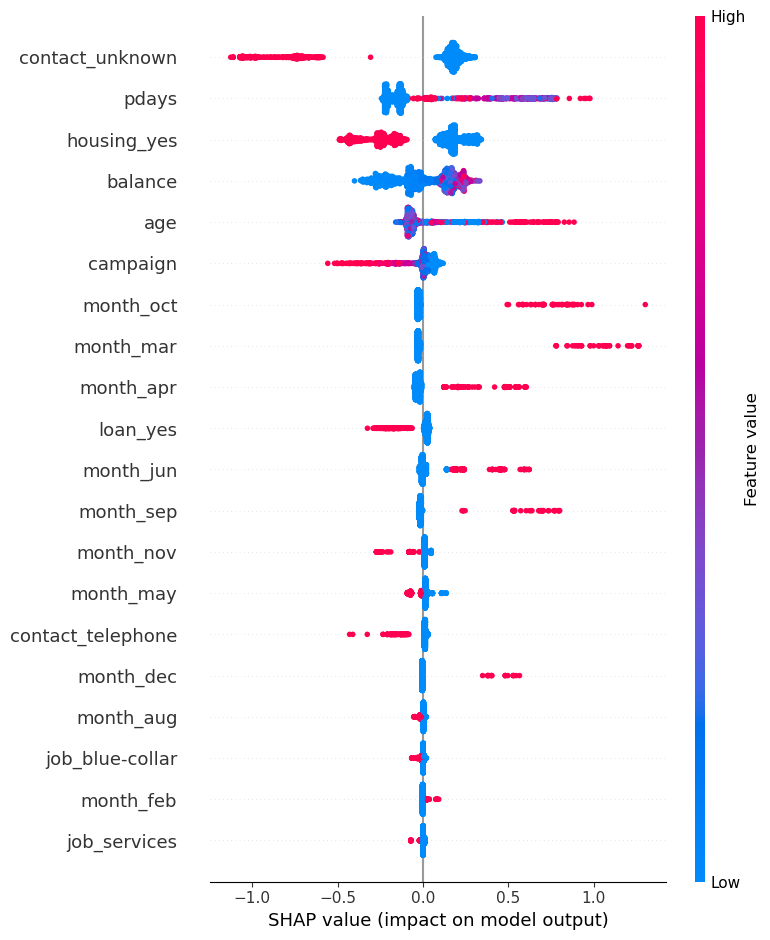

In [1013]:
import shap

X_preprocessed = pipe_tuned['preprocessing'].transform(X_test)

explainer = shap.TreeExplainer(pipe_tuned['modeling'])
shap_values = explainer.shap_values(X_preprocessed)
feature_name = pipe_tuned['preprocessing'].get_feature_names_out()

shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_name)

Prediksi deposit paling kuat dipengaruhi oleh (*contact_unknown, pdays, housing, balance, age*)

Artinya prediksi deposit sangat ditentukan oleh cara kontak, histori kontak, kondisi keuangan, dan usia

- *contact_unknown* -> jika cara kontak unknown, membuat peluang nasabah deposit menurun
- *pdays* -> semakin lama jarak waktu kontak terakhir, justru meningkatkan peluang deposit, mungkin karena setelah lama tidak dihubungi nasabah menjadi terbuka untuk melakukan deposit
- *housing* -> nasabah yang memiliki kredit rumah cenderung menurunkan peluang deposit
- *balance* -> semakin besar saldo, semakin besar peluang deposit
- *age* -> usia tinggi cenderung sedikit meningkatkan peluang deposit
- *campaign* -> semakin sering nasabah dihubungi, semakin rendah peluang deposit

## **L. Streamlit Preparation**

In [1021]:
# best_model.fit(X, y)

In [ ]:
# # Saving model
# with open('bestmodel.mdl', 'wb') as f:
#     pickle.dump(best_model, f)

In [1016]:
import matplotlib
import sklearn
import lightgbm
import streamlit

print(f'''
numpy=={np.__version__}
pandas=={pd.__version__}
seaborn=={sns.__version__}
matplotlib=={matplotlib.__version__}
scikit-learn=={sklearn.__version__}
lightgbm=={lightgbm.__version__}
streamlit=={streamlit.__version__}
''')


numpy==2.2.0
pandas==2.2.3
seaborn==0.13.2
matplotlib==3.10.0
scikit-learn==1.7.0
lightgbm==4.6.0
streamlit==1.49.1



## **M. Conclusion & Recommendation**
### **Conclusion**
#### ***Model***

Model akhir yang digunakan adalah LGBM (Light Gradient Boosting Machine) yang telah dilakukan tuning.

Berdasarkan hasil akhir model yang dibandingkan dengan model sebelum tuning dan optimasi threshold, model ini dioptimasi untuk memaksimalkan recall kelas 1.

Yang artinya dengan model ini kita lebih memilih tidak melewatkan calon nasabah meskipun dengan resiko False Positive (salah mengontak orang yang akhirnya tidak deposit), karena meski demikian, biaya kehilangan nasabah potensial lebih besar daripada biaya menawarkan ke orang yang tidak tertarik.

#### ***Cost Without Model***
***Semua prediksi 0***

In [1017]:
# Semua prediksi 0
cm_zero = np.array([[745, 0], 
                    [708, 0]])
print(analyze_cost(cm_zero))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 0.00 (from 0 successful calls)
    - TN Savings: € 3,725.00 (from 745 avoided calls)
    - Total Benefit: € 3,725.00

    Costs:
    - FP Cost: € 0.00 (from 0 wasted calls)
    - FN Cost: € 10,089.00 (from 708 missed opportunities)
    - Total Cost: € 10,089.00

    Net Profit: € -6,364.00
    


***Semua prediksi 1***

In [1018]:
# Semua prediksi 1
cm_one = np.array([[0, 745], 
                   [0, 708]])
print(analyze_cost(cm_one))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 10,089.00 (from 708 successful calls)
    - TN Savings: € 0.00 (from 0 avoided calls)
    - Total Benefit: € 10,089.00

    Costs:
    - FP Cost: € 3,725.00 (from 745 wasted calls)
    - FN Cost: € 0.00 (from 0 missed opportunities)
    - Total Cost: € 3,725.00

    Net Profit: € 6,364.00
    


#### ***Cost With Model***
***Dengan model sebelum tuning dan optimasi threshold***

In [1019]:
# Dengan model sebelum tuning dan optimasi threshold
print(analyze_cost(cm_base))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 6,640.50 (from 466 successful calls)
    - TN Savings: € 2,915.00 (from 583 avoided calls)
    - Total Benefit: € 9,555.50

    Costs:
    - FP Cost: € 810.00 (from 162 wasted calls)
    - FN Cost: € 3,448.50 (from 242 missed opportunities)
    - Total Cost: € 4,258.50

    Net Profit: € 5,297.00
    


***Dengan model setelah tuning dan optimasi threshold***

In [1020]:
# Dengan model setelah tuning dan optimasi threshold
print(analyze_cost(cm_thres))


    Total Sample: 1453

    Benefits:
    - TP Revenue: € 8,649.75 (from 607 successful calls)
    - TN Savings: € 1,560.00 (from 312 avoided calls)
    - Total Benefit: € 10,209.75

    Costs:
    - FP Cost: € 2,165.00 (from 433 wasted calls)
    - FN Cost: € 1,439.25 (from 101 missed opportunities)
    - Total Cost: € 3,604.25

    Net Profit: € 6,605.50
    


Dari uraian diatas, dengan menggunakan model, benefit yang diperoleh selain lebih besar juga cost yang sedikit lebih rendah jika dibandingkan dengan semua prediksi menjadi 1 (semua orang dihubungi). Dengan demikian penggunaan model bisa meningkatkan efektivitas karyawan, menghemat waktu, meminimalisir biaya yang dikeluarkan dan juga menambah profit walaupun hanya sedikit lebih baik dari semua prediksi menjadi 1. Tetapi penggunaan model akan lebih membantu dalam penghematan waktu, tenaga dan juga biaya.

#### ***Model Limitation***

Keterbatasan Feature
- Karena fitur `poutcome` memiliki banyak nilai *unknown* yaitu 74% dari data yang bisa menyebabkan bias pada model, maka kolom tersebut tidak dijadikan fitur untuk model yang dibangun.

- Pada fitur `contact` terdapat nilai *unknown* yang lumayan banyak sehingga jika diimputasi pun bisa menyebabkan bias maka tetap dipertahankan, namun konsekuensi yang perlu diterima yaitu kurang jelasnya makna *unknown* pada fitur ini karena setelah pembuatan model, *contact - unknown* memiliki pengaruh yang signfikan dalam model.

### **Recommendation**

1. Rekomendasi Bisnis
- Fokus untuk melakukan telepon kepada nasabah dengan probabilitas tinggi
- Buat segmentasi perlakuan nasabah, contoh :
    - Probabilitas Tinggi : telepon langsung
    - Probabilitas sedang : hubungi melalui email atau WA (lebih murah)
    - Probabilitas Rendah : bisa dipertimbangkan untuk tidak perlu dihubungi
- Melakukan evaluasi biaya secara berkala untuk memastikan model yang digunakan dapat memberikan keuntungan yang optimal, dengan menyesuaikan threshold berdasarkan perubahan biaya yang ada supaya  

2. Meningkatkan Performa Model
- Untuk meningkatkan performa model agar lebih baik bisa menambah beberapa fitur seperti Gaji, Jumlah Deposit yang sudah ada
- Menjelaskan nilai *unknown* lebih spesifik agar lebih reasonable dan bisa dijadikan treatment yang lebih tepat
- Update model dengan data terbaru di setiap batch Campaign Program, perubahan dalam data bisa mempengaruhi kinerja model. Dengan pemantuan berkala, model lebih bisa menyesuaikan dengan variasi data yang beragam


### **Harapan**

Dengan pembuatan model ini diharapkan Bank dapat mengoptimalkan Campaign Program dengan lebih cepat, efektif dan efisien
- Mengoptimalkan campaign program dengan target nasabah yang lebih terfokus sehingga mengurangi kontak yang tidak efektif
- Meminimalisir waktu dan tenaga tim marketing/telemarketing karena upaya diarahkan pada calon nasabah dengan probabilitas tinggi untuk membuka deposito
- Mengurangi biaya operasional (seperti biaya telepon dan sumber daya lainnya) sehingga anggaran dapat dialokasikan lebih efisien
- Meningkatkan keuntungan jangka pendek maupun jangka panjang, tidak hanya dengan menekan False Positive (nasabah yang ditelepon tapi tidak deposit), tetapi juga dengan mengurangi False Negative (kehilangan nasabah yang potensial)